In [ ]:
import pandas as pd

# 1. Load the Excel file
path = 'Generating Unit Statistical Brochure 3 2019-2023 - Units Reporting Events.xlsx'
df = pd.read_excel(path)

# 2. Clean up column names
df = df.rename(columns={'Generator Catagory/Classification': 'Generator_Category'})

# 3. Convert key columns to numeric (coerce non-numeric to NaN)
cols_to_num = ['# Units', 'Unit-Years', 'WEFOR', 'WFOR']
for col in cols_to_num:
    df[col] = pd.to_numeric(
        df[col].astype(str)
              .str.replace(',', '')
              .str.replace('%', ''),
        errors='coerce'
    )

# 4. Quick look at the data
print("=== Head of DataFrame ===")
print(df.head(), "\n")

# 5. Descriptive statistics
print("=== Descriptive Statistics for # Units, Unit-Years, WEFOR, WFOR ===")
print(df[cols_to_num].describe(), "\n")



=== Head of DataFrame ===
                    Generator_Category   Start     End  # Units  Unit-Years  \
0  FOSSIL  All Fuel Types    All Sizes  2019.0  2023.0   1030.0     4105.83   
1  FOSSIL  All Fuel Types      001-099  2019.0  2023.0    208.0      816.00   
2  FOSSIL  All Fuel Types      100-199  2019.0  2023.0    218.0      772.83   
3  FOSSIL  All Fuel Types      200-299  2019.0  2023.0    115.0      464.00   
4  FOSSIL  All Fuel Types      300-399  2019.0  2023.0     95.0      390.00   

   NMC  NDC Attempts Actual       SH  ...    UOF   EUOF   EUOR    WSF    WAF  \
0  346  345    30.74  30.38  4266.43  ...  10.32  12.68  20.16  55.93  79.76   
1   52   51       34  33.86  3455.24  ...  12.22  14.18  24.18  46.81  80.09   
2  135  134    77.36  77.01  3473.33  ...   9.68  11.87  21.94   44.3  80.77   
3  231  230    15.64  15.32  4799.21  ...   8.98  11.33  17.01  56.98  82.52   
4  341  340    22.66  22.17  3864.66  ...   9.79  12.45  22.12  45.33  78.56   

    WEAF   WFOR  W

In [4]:
# 6. Aggregate by generator category
cat_summary = (
    df
    .groupby('Generator_Category')
    .agg({
        '# Units':   'sum',
        'Unit-Years':'sum',
        'WEFOR':     'mean',
        'WFOR':      'mean'
    })
    .sort_values('# Units', ascending=False)
)
cat_summary 


,# Units,Unit-Years,WEFOR,WFOR
Generator_Category,,,,
FOSSIL All Fuel Types All Sizes,1030.0,4105.83,12.94,9.38
HYDRO All Sizes,902.0,4302.00,5.62,5.50
FOSSIL Coal Primary All Sizes,627.0,2278.08,11.56,8.54
GAS TURBINE All Sizes,590.0,2661.42,35.22,32.45
HYDRO 30 Plus,570.0,2715.00,5.08,4.98
...,...,...,...,...
FOSSIL Oil Primary 1000 Plus,0.0,0.00,NaN,NaN
NUCLEAR CANDU All Sizes,0.0,0.00,NaN,NaN
FOSSIL Oil Primary 200-299,0.0,0.00,NaN,NaN


In [9]:
#after clean 
# after reading & cleaning df…
df_valid = df[df['# Units'] > 0]
summary_clean = (
    df_valid
    .groupby('Generator_Category')
    .agg({
        '# Units':   'sum',
        'Unit-Years':'sum',
        'WEFOR':     'mean',
        'WFOR':      'mean'
    })
)
print(summary_clean.to_string())

                                     # Units  Unit-Years  WEFOR   WFOR
Generator_Category                                                    
COMBINED CYCLE            All Sizes    343.0     1466.92   4.01   3.00
DIESEL                    All Sizes    210.0      820.33  11.64   9.09
FOSSIL  All Fuel Types      001-099    208.0      816.00  18.57  15.07
FOSSIL  All Fuel Types      100-199    218.0      772.83  16.15  12.40
FOSSIL  All Fuel Types      200-299    115.0      464.00  10.63   7.34
FOSSIL  All Fuel Types      300-399     95.0      390.00  14.83  10.44
FOSSIL  All Fuel Types      400-599    189.0      798.00  12.88   9.27
FOSSIL  All Fuel Types      600-799    126.0      552.00  12.68   9.23
FOSSIL  All Fuel Types      800-999     67.0      257.00  10.88   7.84
FOSSIL  All Fuel Types    1000 Plus     13.0       56.00  15.20  10.82
FOSSIL  All Fuel Types    All Sizes   1030.0     4105.83  12.94   9.38
FOSSIL  Coal Primary        001-099     80.0      211.00   9.87   7.92
FOSSIL

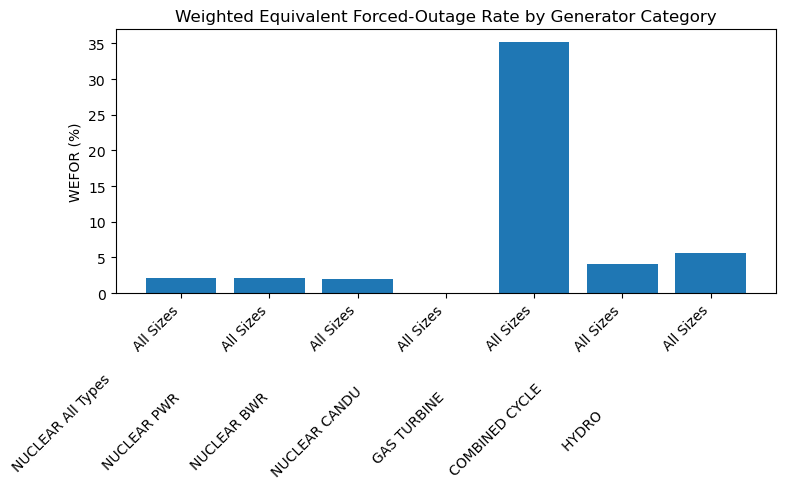

In [11]:
#graph 
import matplotlib.pyplot as plt

df = df.rename(columns={'Generator Catagory/Classification': 'Generator_Category'})
# Filter for "All Sizes" rows of key categories using regex, avoiding NaN
cat_series = df['Generator_Category'].fillna('')
patterns = ['NUCLEAR.*All Sizes', 'COMBINED CYCLE.*All Sizes', 'HYDRO.*All Sizes', 'GAS TURBINE.*All Sizes']
mask = cat_series.str.contains('|'.join(patterns), regex=True)
df_plot = df[mask].set_index('Generator_Category')

# Plot bar chart
plt.figure(figsize=(8, 5))
plt.bar(df_plot.index, df_plot['WEFOR'])
plt.ylabel('WEFOR (%)')
plt.title('Weighted Equivalent Forced-Outage Rate by Generator Category')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()
